<a href="https://colab.research.google.com/github/hananedjellouadji/GMC_AI/blob/main/stage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import normalize

In [ ]:
ds=pd.read_csv('bilan.csv', sep=';')
ds

,annee,mois,vol_debut_mois,vol_fin_mois,apports,tot_prelev,evapo,temp_eau_moy,lachee,pluie,taux_remp
0,2011,11,105.301,101.611,0.000,4.491,0.304,6.83,0.000,0.5018,63.97
1,2011,12,101.611,110.324,13.787,4.868,0.189,4.30,0.010,1.0791,69.67
2,2012,1,110.324,118.684,14.095,4.805,0.185,4.25,0.745,0.6970,74.72
3,2012,2,118.684,142.977,141.506,4.495,0.261,4.46,112.457,3.0300,90.02
4,2012,3,142.977,140.694,83.690,4.805,0.283,7.50,80.885,0.7030,88.58
...,...,...,...,...,...,...,...,...,...,...,...
105,2020,8,75.284,65.267,0.000,9.396,0.904,23.00,0.000,0.0000,42.02
106,2020,9,65.267,58.442,0.459,6.791,0.511,18.73,0.000,0.0930,37.63
107,2020,10,58.442,51.138,0.041,6.949,0.394,14.58,0.000,0.1310,32.92
108,2020,11,51.138,46.814,4.767,5.678,0.297,10.50,0.000,0.4600,30.14


explications : (Rq : tous les volumes sont exprimés en hm3)



vol_debut_mois : c'est le volume que contient le barrage au début du mois.


---



vol_fin_mois : c'est le volume que contient le barrage à la fin du mois.


---


apports : c'est le volume qu'a reçue le barrage durant tout le mois (à partir des affluants)


---


tot_prelev : c'est le volume total de consommation (de l'AEP, des industries, de l'ONID (irrigation), et de Bouhedjar) durant le mois


---


evapo : le volume évaporé durant tout le mois


---


temp_eau_moy : la température moyenne de l'eau durant le mois considéré


---


lachee : c'est le volume évacué pour éviter les inondations (vidange)


---


pluie : pluviomètrie du mois considéré 


---


taux_remp : c'est le taux de remplissage du barrage (par rapport à sa capacité maximale estimée 158.83 hm3 , et estimée 155.314 à partir de 2019)

In [ ]:
ds.isnull().sum() #somme des donnees manquantes

annee              0
mois               0
vol_debut_mois    22
vol_fin_mois      15
apports           24
tot_prelev        24
evapo             24
temp_eau_moy      24
lachee            24
pluie             24
taux_remp         16
dtype: int64

In [ ]:
ds.drop(['annee','mois'], axis=1).describe() #statistiques

,vol_debut_mois,vol_fin_mois,apports,tot_prelev,evapo,temp_eau_moy,lachee,pluie,taux_remp
count,88.000000,95.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,94.000000
mean,93.688415,89.490153,10.274581,6.070267,0.453674,11.914535,3.911674,0.465256,56.428617
std,30.519601,32.531803,21.983565,2.786541,0.278429,5.454901,16.390186,0.497127,20.720320
min,12.677000,12.677000,0.000000,0.584000,0.124000,2.790000,0.000000,0.000000,7.980000
25%,76.098750,67.007500,0.041000,4.358750,0.228500,7.710000,0.000000,0.076500,42.232500
50%,95.746500,90.470000,1.376500,5.556500,0.369500,10.535000,0.000000,0.336000,56.940000
75%,111.918000,110.875500,10.030250,6.942250,0.645000,16.797500,0.000000,0.681750,70.860000
max,148.562000,148.562000,141.506000,13.991000,1.337000,23.000000,112.457000,3.030000,93.530000


In [ ]:
ds[ds['annee']==2020].drop(['annee','mois'], axis=1).describe()

,vol_debut_mois,vol_fin_mois,apports,tot_prelev,evapo,temp_eau_moy,lachee,pluie,taux_remp
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0,12.000000,12.000000
mean,85.658583,81.844000,3.721833,7.020917,0.444250,13.374167,0.0,0.260750,52.694167
std,24.885122,24.396291,6.218593,2.560248,0.237274,5.346184,0.0,0.276979,15.708579
min,46.814000,46.814000,0.000000,4.549000,0.247000,7.100000,0.0,0.000000,30.140000
25%,63.560750,62.142500,0.034250,5.376000,0.282750,8.535000,0.0,0.042500,40.007500
50%,94.202500,81.983000,0.289000,6.198000,0.345500,12.685000,0.0,0.164000,52.785000
75%,107.339000,106.547000,4.980500,7.560750,0.526750,17.432500,0.0,0.406000,68.600000
max,111.003000,111.173000,21.393000,11.933000,0.904000,23.000000,0.0,0.897000,71.580000


In [ ]:
ds20=ds[ds['annee']==2020].drop(['annee','lachee'], axis=1)
ds20

,mois,vol_debut_mois,vol_fin_mois,apports,tot_prelev,evapo,temp_eau_moy,pluie,taux_remp
98,1,110.324,111.173,5.621,4.549,0.294,7.74,0.388,71.58
99,2,111.003,106.297,0.068,4.694,0.247,7.83,0.026,68.44
100,3,106.130,107.882,7.705,5.859,0.261,7.10,0.585,69.46
101,4,107.966,107.297,4.475,4.770,0.290,11.27,0.288,69.08
102,5,107.130,100.476,0.119,6.537,0.403,14.10,0.197,64.69
103,6,100.234,88.399,0.014,11.517,0.574,17.00,0.016,56.92
104,7,88.171,75.567,0.000,11.933,0.899,19.87,0.048,48.65
105,8,75.284,65.267,0.000,9.396,0.904,23.00,0.000,42.02
106,9,65.267,58.442,0.459,6.791,0.511,18.73,0.093,37.63
107,10,58.442,51.138,0.041,6.949,0.394,14.58,0.131,32.92


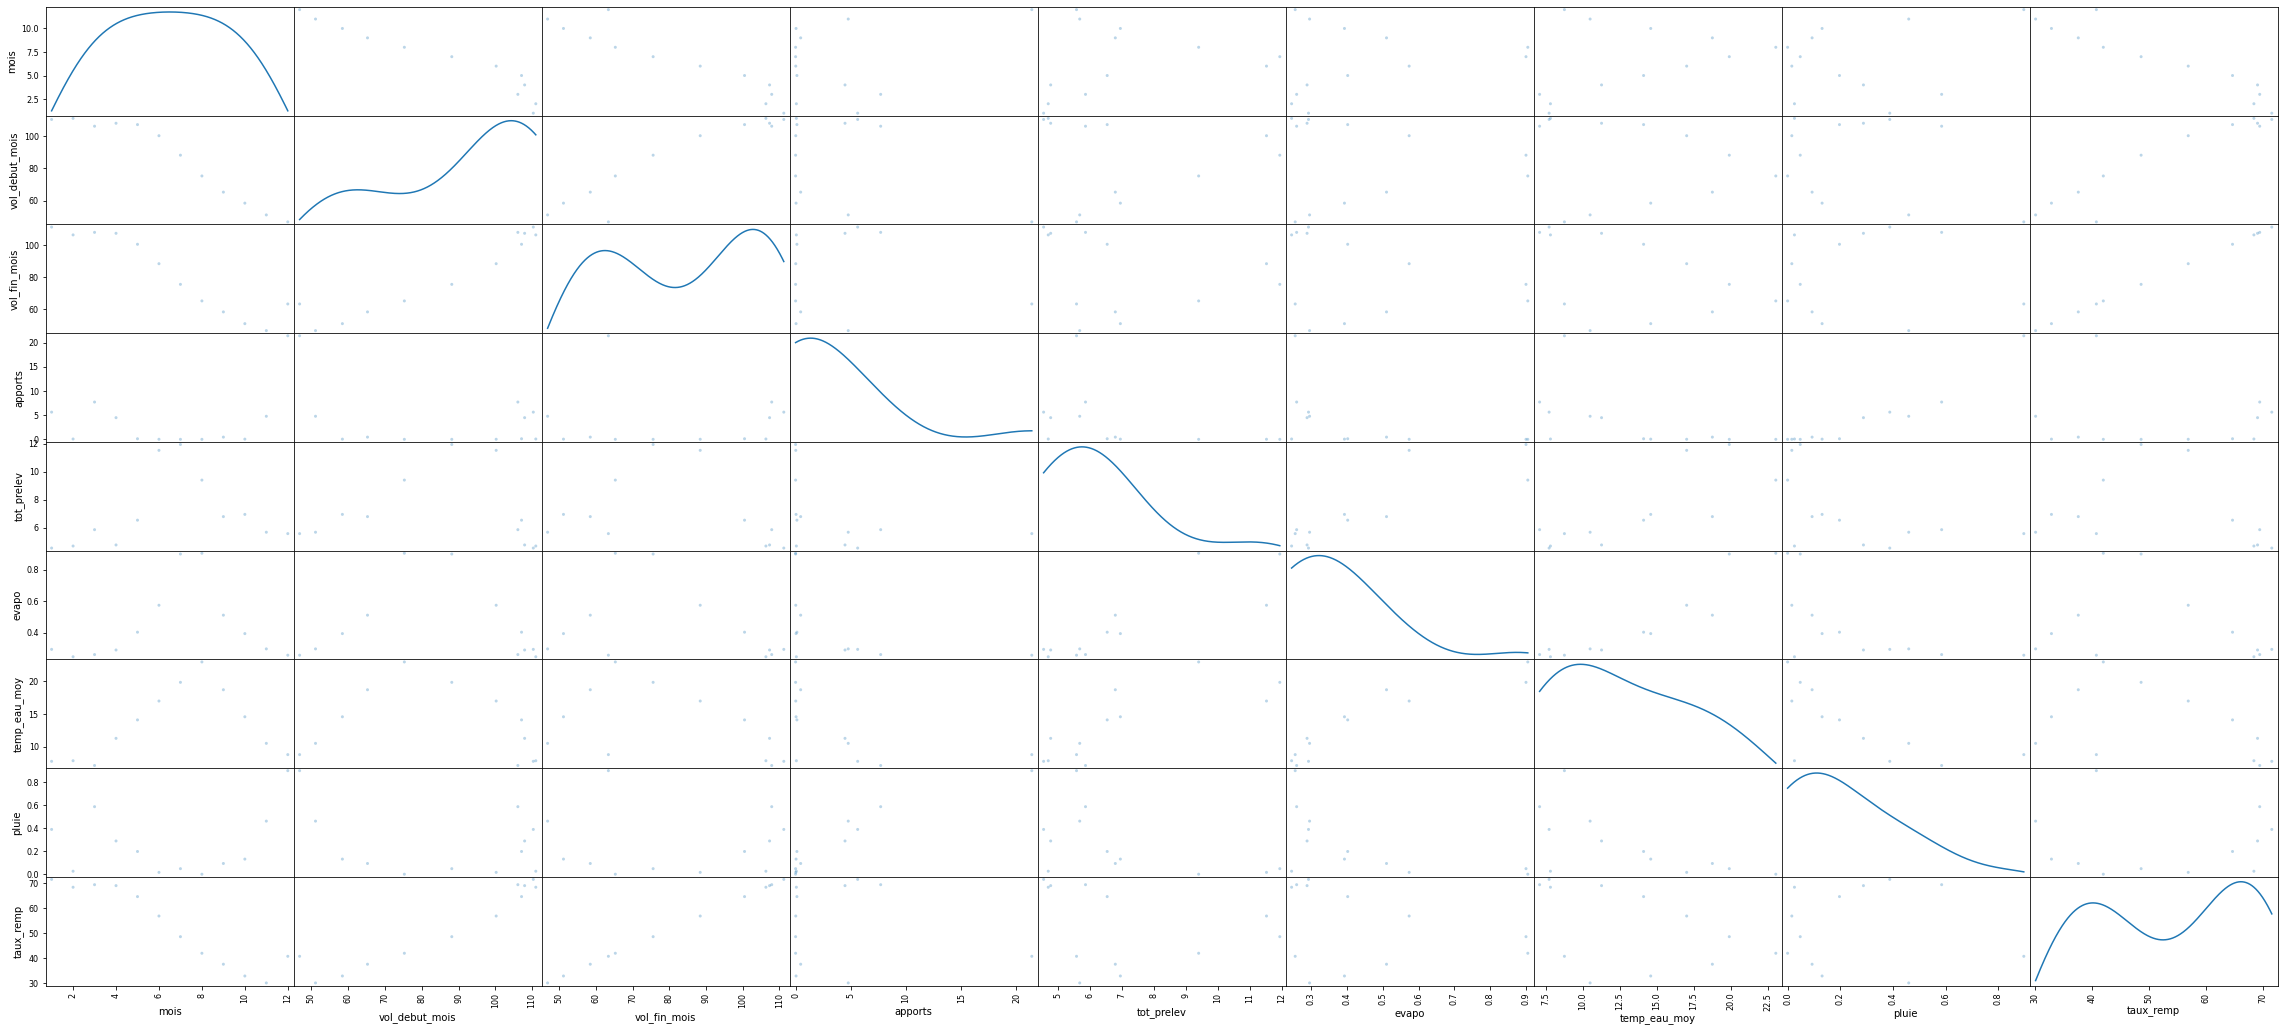

In [ ]:
pd.plotting.scatter_matrix(ds20, alpha = 0.3, figsize = (40,18), diagonal = 'kde');

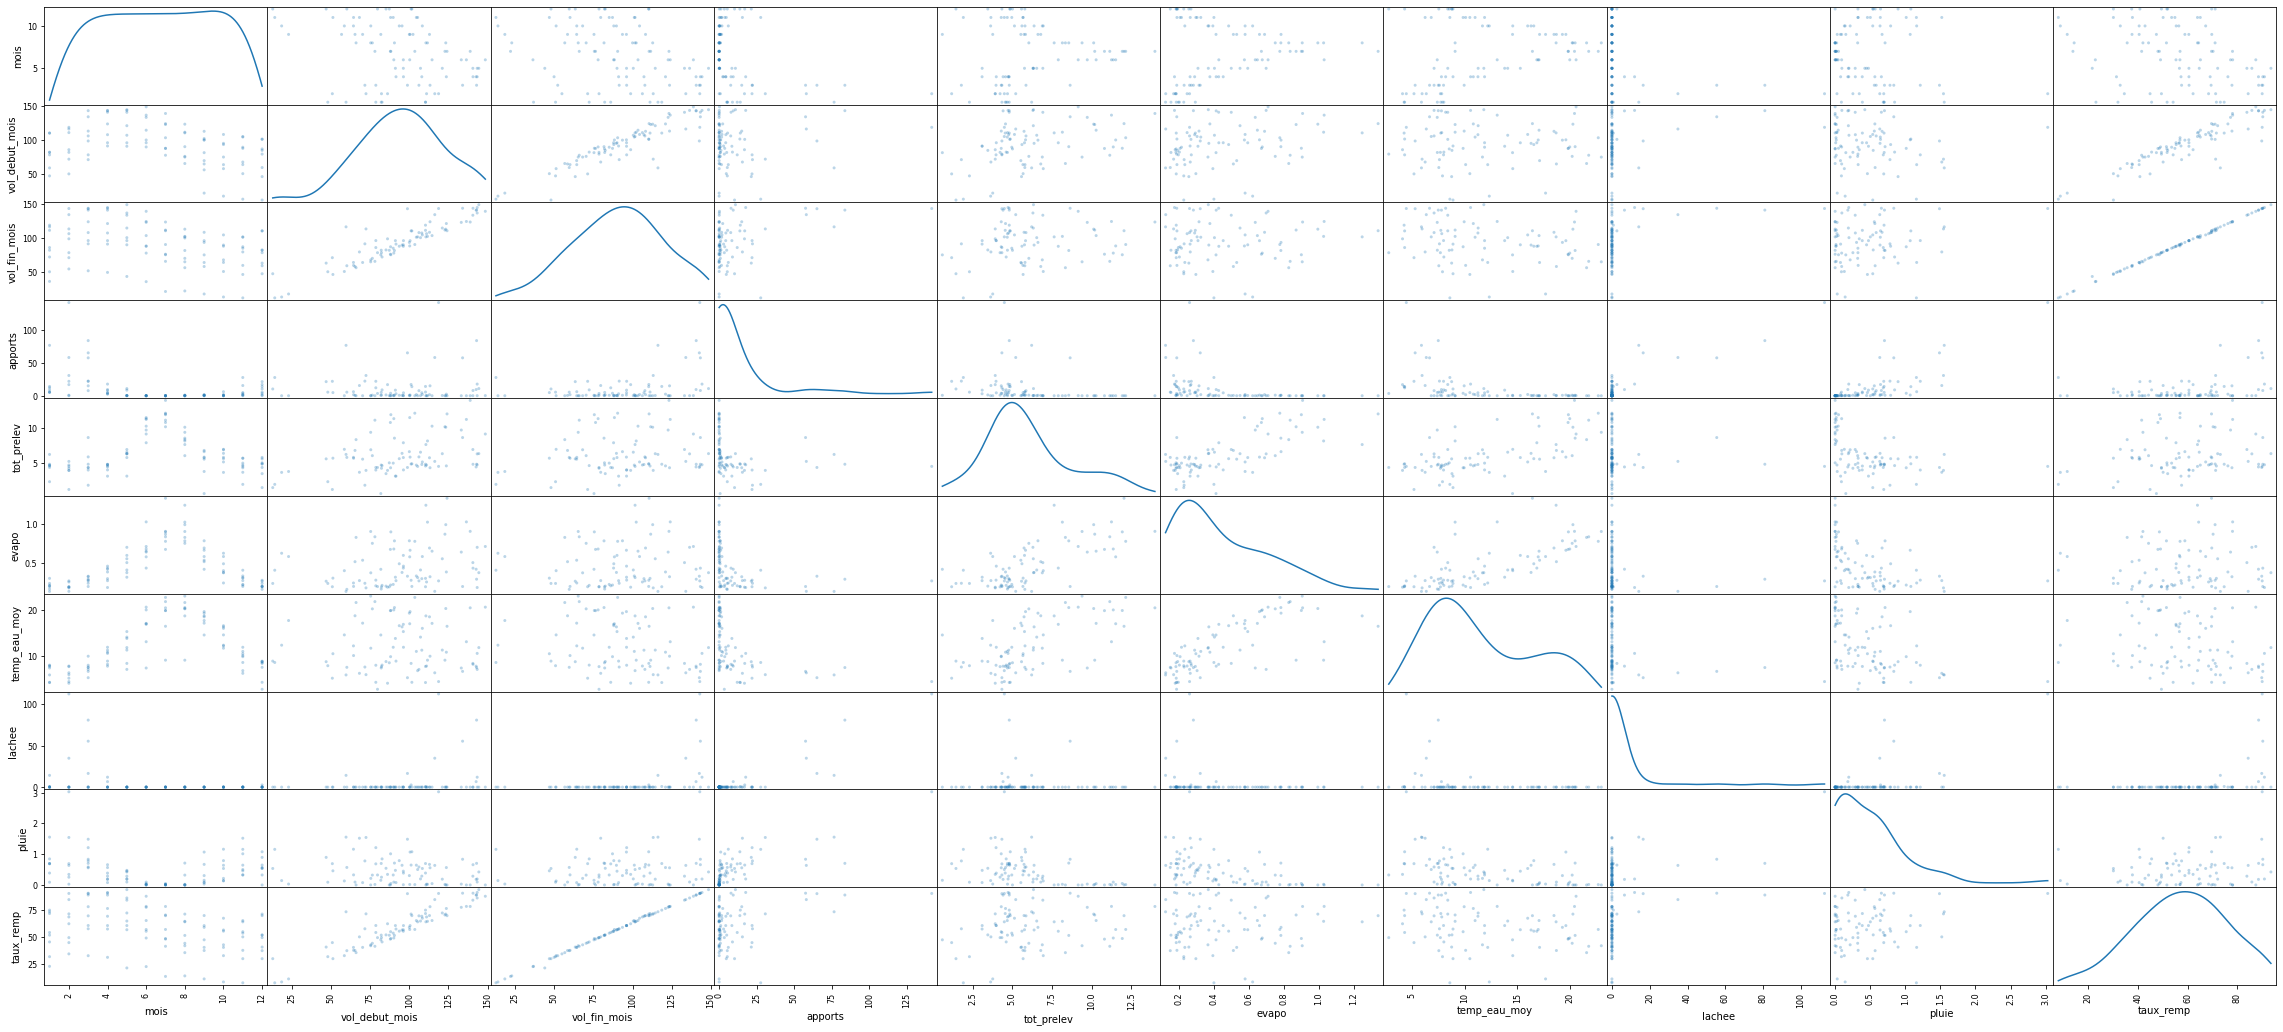

In [ ]:
pd.plotting.scatter_matrix(ds.drop(['annee'], axis=1), alpha = 0.3, figsize = (40,18), diagonal = 'kde'); #tout en fonction de tout

In [ ]:
ds_1=ds[ds['mois']==7].drop(['mois'], axis=1)
ds_1 #dataset du mois de Mars

,annee,vol_debut_mois,vol_fin_mois,apports,tot_prelev,evapo,temp_eau_moy,lachee,pluie,taux_remp
8,2012,124.091000,110.578000,0.000000,12.043000,1.337000,16.450000,0.000000,0.000000,69.620000
20,2013,103.490000,90.470000,0.000000,12.149000,0.776000,22.710000,0.000000,0.012100,56.960000
32,2014,122.750000,111.598000,0.000000,10.194000,0.869000,9.100000,0.000000,0.017400,70.260000
44,2015,93.688415,89.490153,10.274581,6.070267,0.453674,11.914535,3.911674,0.465256,56.428617
56,2016,77.985000,65.930000,0.000000,11.144000,0.835000,21.800000,0.000000,0.016000,41.510000
68,2017,93.688415,22.000000,10.274581,6.070267,0.453674,11.914535,3.911674,0.465256,13.850000
80,2018,87.867000,76.347000,0.000000,10.809000,0.671000,19.840000,0.000000,0.000000,48.060000
92,2019,138.897000,123.286000,0.000000,13.991000,0.906000,20.450000,0.000000,0.000000,78.070000
104,2020,88.171000,75.567000,0.000000,11.933000,0.899000,19.870000,0.000000,0.048000,48.650000


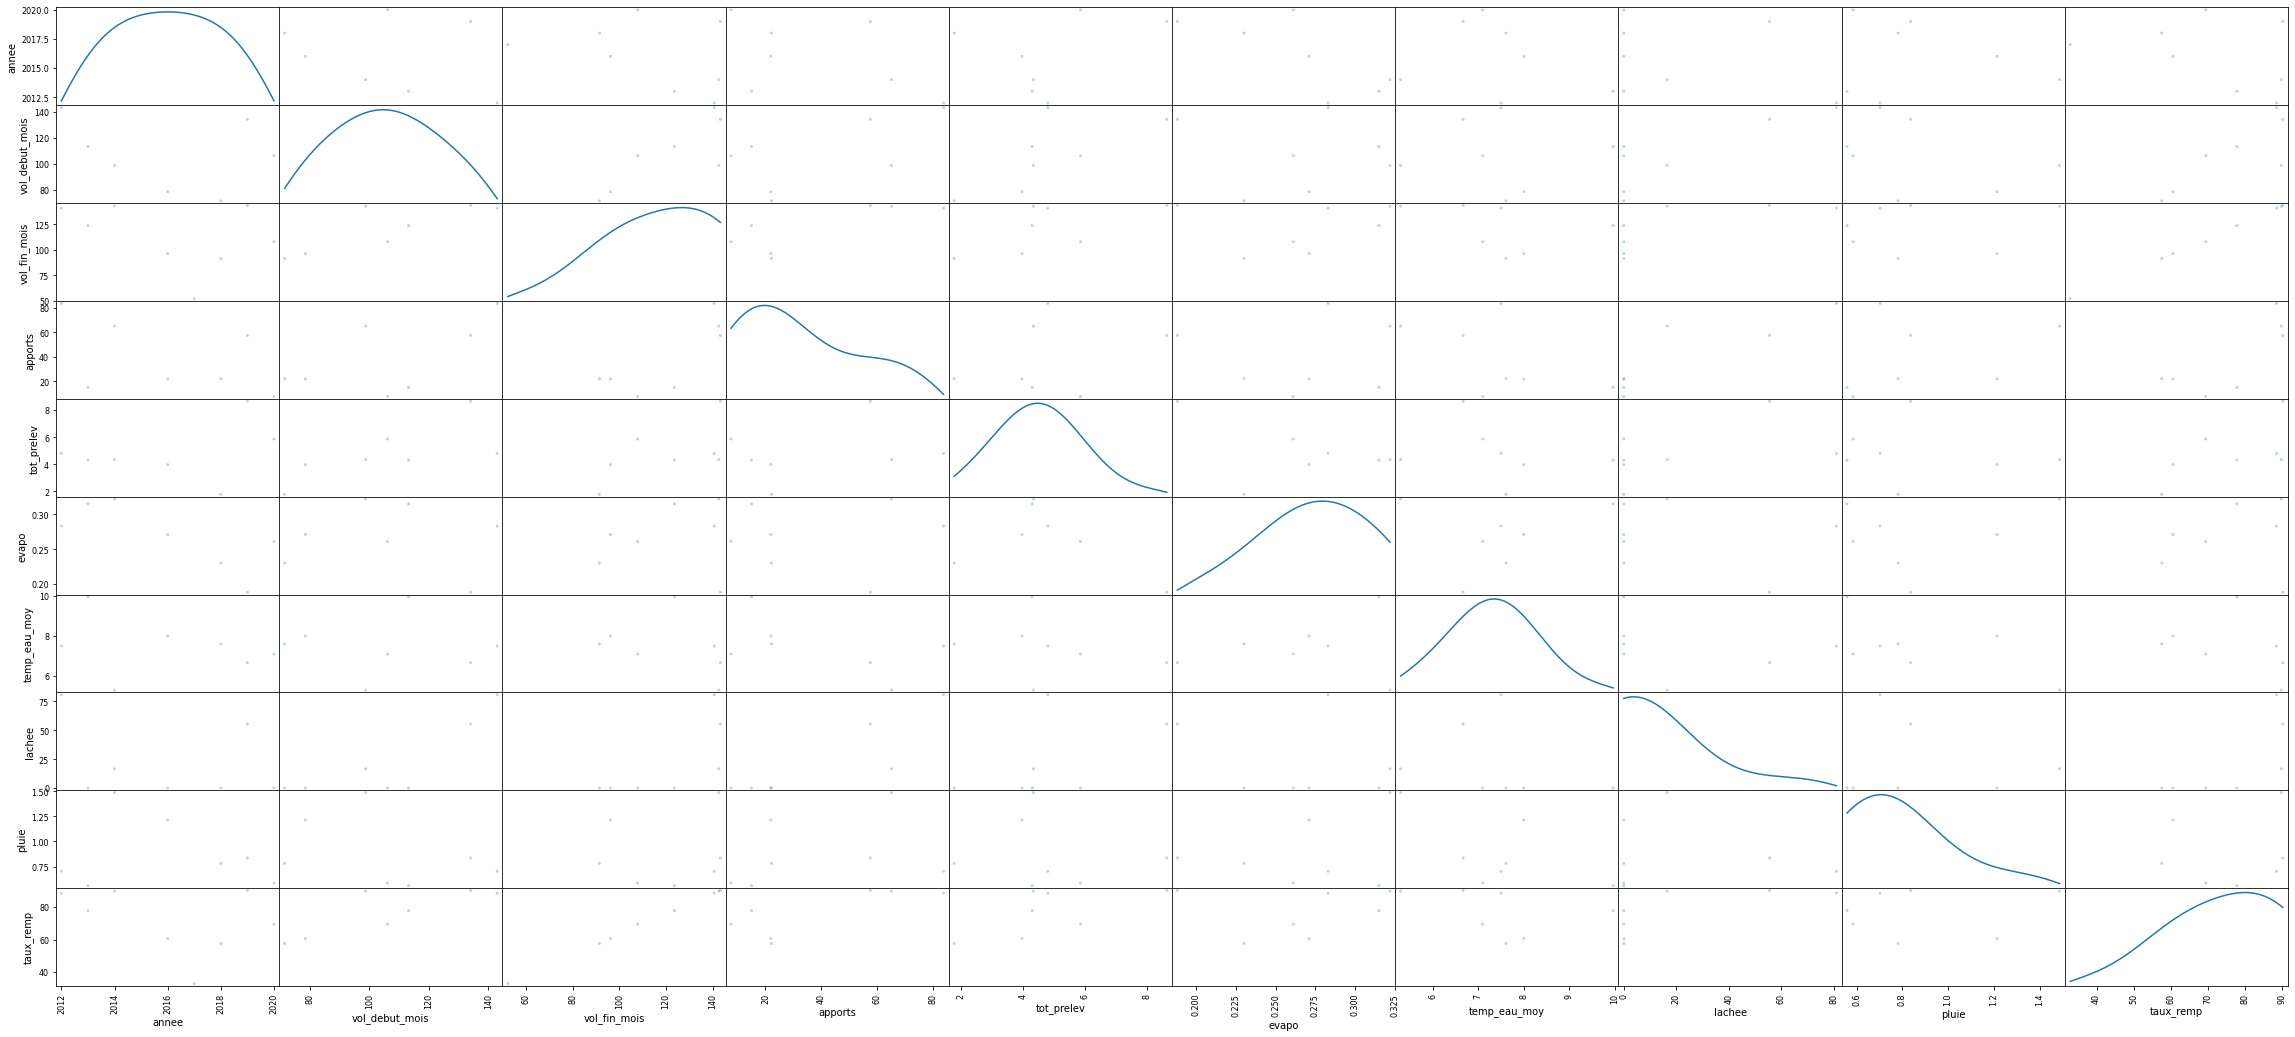

In [ ]:
pd.plotting.scatter_matrix(ds_1, alpha = 0.3, figsize = (40,18), diagonal = 'kde');

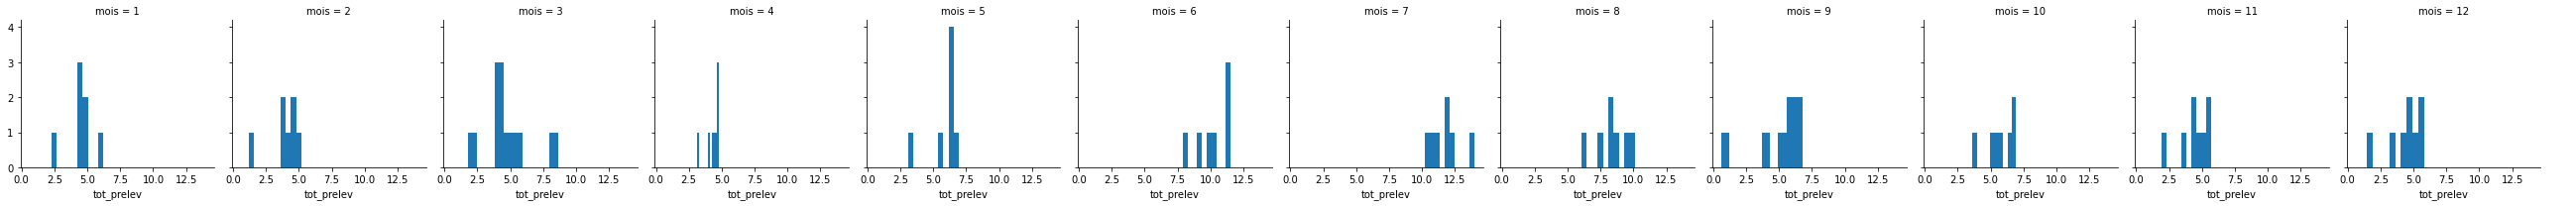

In [ ]:
g=sns.FacetGrid(ds,col='mois')
g.map(plt.hist,'tot_prelev', bins=10)
g.add_legend()

la consommation est plus importante durant la période estivale

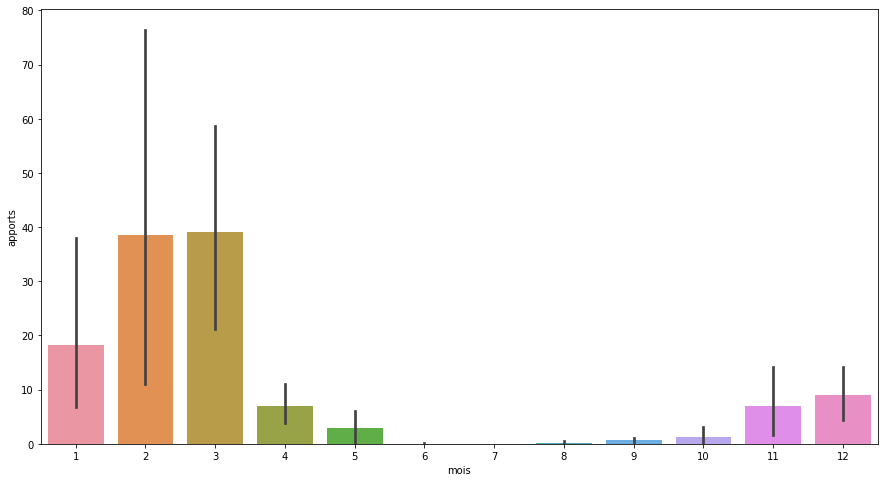

In [ ]:
fig = plt.figure(figsize = (15,8))
sns.barplot(x = 'mois', y = 'apports', data = ds)

les apoorts sont plus importants dans la période pluviale

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


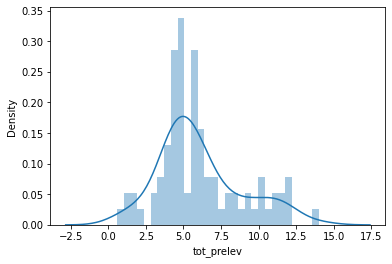

In [ ]:
sns.distplot(ds["tot_prelev"], bins= 30)
plt.show() #we want to see how much every dosage is used

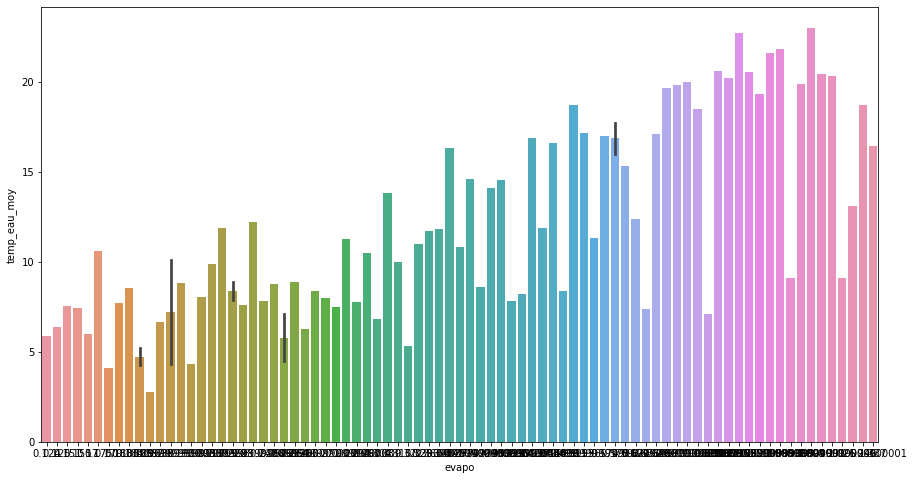

In [ ]:
fig = plt.figure(figsize = (15,8))
sns.barplot(x = 'evapo', y = 'temp_eau_moy', data = ds) #we want to see the influence of density on the quality

In [ ]:
ds.fillna(ds.mode(),inplace=True)
ds

,annee,mois,vol_debut_mois,vol_fin_mois,apports,tot_prelev,evapo,temp_eau_moy,lachee,pluie,taux_remp
0,2011,11,105.301,101.611,0.000,4.491,0.304,6.83,0.000,0.5018,63.97
1,2011,12,101.611,110.324,13.787,4.868,0.189,4.30,0.010,1.0791,69.67
2,2012,1,110.324,118.684,14.095,4.805,0.185,4.25,0.745,0.6970,74.72
3,2012,2,118.684,142.977,141.506,4.495,0.261,4.46,112.457,3.0300,90.02
4,2012,3,142.977,140.694,83.690,4.805,0.283,7.50,80.885,0.7030,88.58
...,...,...,...,...,...,...,...,...,...,...,...
105,2020,8,75.284,65.267,0.000,9.396,0.904,23.00,0.000,0.0000,42.02
106,2020,9,65.267,58.442,0.459,6.791,0.511,18.73,0.000,0.0930,37.63
107,2020,10,58.442,51.138,0.041,6.949,0.394,14.58,0.000,0.1310,32.92
108,2020,11,51.138,46.814,4.767,5.678,0.297,10.50,0.000,0.4600,30.14


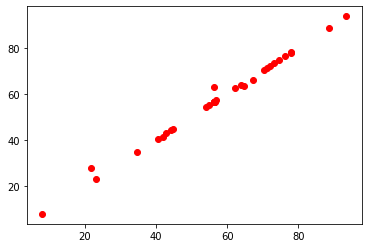

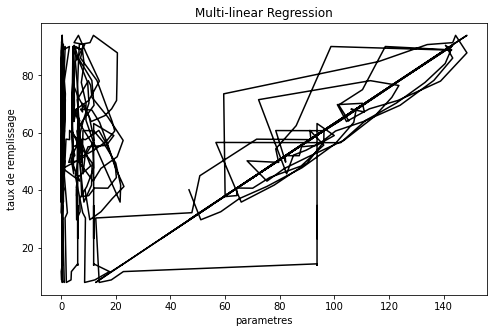

R squared 0.9922356948726889


In [ ]:
x=ds.drop(['taux_remp','annee','mois','lachee','apports'], axis=1).values #reshaping the array
y=ds['taux_remp'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40) #splitting
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)
plt.scatter(y_test,predicted,color='r') 
plt.figure(figsize=(8,5))
plt.ylabel('taux de remplissage')
plt.xlabel('parametres')
plt.title('Multi-linear Regression')
plt.plot(x,model.predict(x),color='k')
plt.show() #here we did a milti linear regression between the features and the quality
print("R squared", metrics.r2_score(y_test,predicted))

In [ ]:
df = pd.get_dummies(ds,drop_first=True)
df['taux_remp'] = [ 1 if x>=50 else 0 for x in df.taux_remp] 
print(df)

     annee  mois  vol_debut_mois  ...   lachee   pluie  taux_remp
0     2011    11         105.301  ...    0.000  0.5018          1
1     2011    12         101.611  ...    0.010  1.0791          1
2     2012     1         110.324  ...    0.745  0.6970          1
3     2012     2         118.684  ...  112.457  3.0300          1
4     2012     3         142.977  ...   80.885  0.7030          1
..     ...   ...             ...  ...      ...     ...        ...
105   2020     8          75.284  ...    0.000  0.0000          0
106   2020     9          65.267  ...    0.000  0.0930          0
107   2020    10          58.442  ...    0.000  0.1310          0
108   2020    11          51.138  ...    0.000  0.4600          0
109   2020    12          46.814  ...    0.000  0.8970          0

[110 rows x 11 columns]


In [ ]:
x=df.drop(['taux_remp','mois'], axis=1).values #reshaping the array
y=df['taux_remp'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40) #splitting
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
result_dtree=cross_val_score(dtree,x_train,y_train,cv=10,scoring='accuracy')
print('DT depth :', dtree.get_depth()) #getting the depth of the decision tree
print("Score:{}".format(accuracy_score(y_pred,y_test))) #testing the accuracy of the model
print('cross validated score:',round(result_dtree.mean()*100,2)) #testing the performance of the decision tree

DT depth : 1
Score:1.0
cross validated score: 98.75


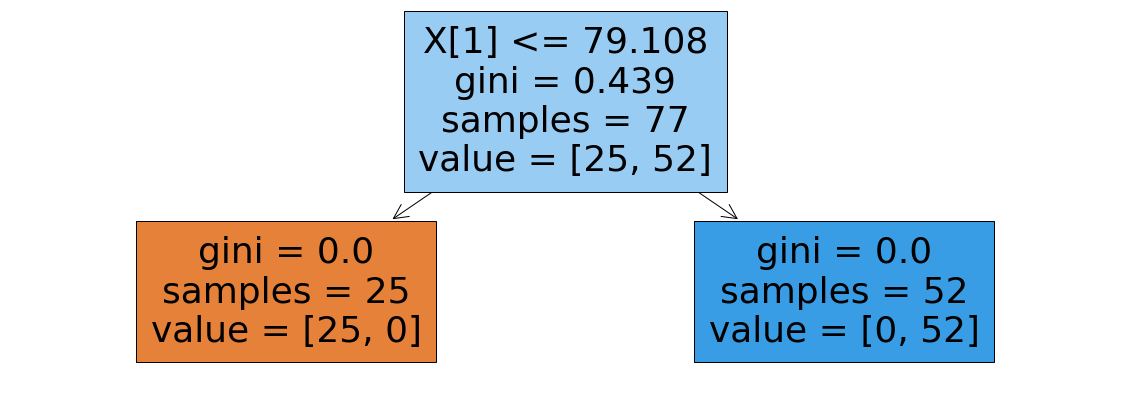

In [ ]:
fig = plt.figure(figsize=(20,7))
_ = tree.plot_tree(dtree.fit(x_train,y_train),filled=True) #plottign the classification